# Gaussian Mixture and Validation Metrics

Soft-clustering with Gaussian Mixture Models and quantitative validation metrics.

## Setup

We import NumPy and Clustor, configure NumPy printing for readability, and create a small dataset with two obvious clusters.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

root = Path.cwd()
if not (root / "python").exists():
    for parent in root.parents:
        if (parent / "python").exists():
            root = parent
            break

sys.path.insert(0, str(root / "python"))

import clustor  # noqa: E402

np.set_printoptions(precision=6, suppress=True)

X = np.array(
    [
        [0.0, 0.0],
        [0.0, 1.0],
        [1.0, 0.0],
        [10.0, 10.0],
        [10.0, 11.0],
        [11.0, 10.0],
    ],
    dtype=np.float64,
)

X

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [10., 10.],
       [10., 11.],
       [11., 10.]])

## Gaussian Mixture

GaussianMixture returns soft assignments and diagonal covariance estimates.

In [2]:
gm = clustor.GaussianMixture(2, max_iter=50, tol=1e-4, random_state=0)
gm_out = gm.fit(X)
gm_out["weights"]

array([0.5, 0.5])

In [3]:
gm_out["means"]

array([[10.333333, 10.333333],
       [ 0.333333,  0.333333]])

In [4]:
gm_out["covars"]

array([[0.222223, 0.222223],
       [0.222223, 0.222223]])

In [5]:
gm_out["converged"]

True

## Validation metrics

Compute standard clustering validation metrics using KMeans labels.

In [6]:
labels = clustor.KMeans(n_clusters=2, n_init=1, max_iter=50, random_state=0).fit(X)[
    "labels"
]
clustor.silhouette_score(X, labels)

0.9196222281154851

In [7]:
clustor.calinski_harabasz_score(X, labels)

450.00000000000017

In [8]:
clustor.davies_bouldin_score(X, labels)

0.09249505911485287

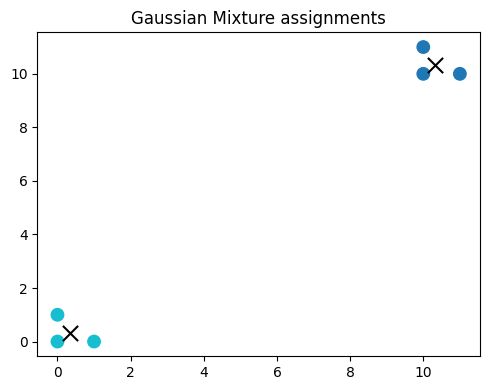

In [9]:
gm_labels = gm.predict(X)
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(X[:, 0], X[:, 1], c=gm_labels, cmap="tab10", s=80)
ax.scatter(gm_out["means"][:, 0], gm_out["means"][:, 1], c="black", marker="x", s=120)
ax.set_title("Gaussian Mixture assignments")
plt.tight_layout()